# Introduction
State notebook purpose here

### Imports
Import libraries and write settings here.

In [2]:
# Data manipulation
import pandas as pd
import numpy as np

# Options for pandas
pd.options.display.max_columns = 50
pd.options.display.max_rows = 30

# Display all cell outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from IPython import get_ipython
ipython = get_ipython()

# autoreload extension
if 'autoreload' not in ipython.extension_manager.loaded:
    %load_ext autoreload

%autoreload 2

# Visualizations
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

import cufflinks as cf
cf.go_offline(connected=True)
cf.set_config_file(theme='white')

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


# Analysis/Modeling
Do work here

# Results
Show graphs and stats here

# Conclusions and Next Steps
Summarize findings here

# Введение

Предобработка данных и их подготовка к анализу и подаче в модель.

Под предобработкой понимаются следующие этапы работы с данными:

- очистка данных от аномальных значений (выбросов);
- работа с пропущенными значениями;
- удаление признаков, которые не несут полезной информации;
- создание новых признаков;
- преобразование признаков и приведение данных к необходимому для анализа и модели формату.

#### FEATURE ENGINEERING

Одним из этапов подготовки данных является удаление, преобразование и создание столбцов таблицы.

Зачем нужны такие манипуляции? 

Оказывается, что при правильных преобразованиях таблицы можно добиваться лучшего качества прогноза, а также извлекать новую информацию из данных и интерпретировать её для заказчика. 

Такой подход часто называют Feature Engineering, или генерацией признаков (фичей).

###### В данном модуле мы сделаем первые шаги в изучении темы подготовки данных и рассмотрим базовые подходы и методы магии под кодовым названием Feature Engineering.

Цели данного модуля:

- Научиться создавать новые признаки в данных с помощью базовых операций со столбцами.
- Освоить методы работы с датой и временем в Pandas.
- Научиться применять собственные функции для преобразования столбцов и создания новых признаков.
- Познакомиться с новым типом данных category и научиться использовать его при работе с данными.

In [3]:
import pandas as pd

melb_data = pd.read_csv('data/melb_data_ps.csv', sep=',')
melb_data.head()

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Coordinates
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,2,1,1,202.0,126.0,1970,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,"-37.7996, 144.9984"
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,2,1,0,156.0,79.0,1900,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,"-37.8079, 144.9934"
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,3,2,0,134.0,150.0,1900,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,"-37.8093, 144.9944"
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067,3,2,1,94.0,126.0,1970,Yarra,-37.7969,144.9969,Northern Metropolitan,4019,"-37.7969, 144.9969"
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067,3,1,2,120.0,142.0,2014,Yarra,-37.8072,144.9941,Northern Metropolitan,4019,"-37.8072, 144.9941"


# 2. Базовые операции со столбцами DataFrame

СОЗДАНИЕ КОПИИ ТАБЛИЦЫ

Поэтому, чтобы не переопределять переменную melb_data и тем самым не повредить первоначальный DataFrame, создадим копию melb_df с помощью метода copy():

In [7]:
melb_df = melb_data.copy()
melb_df.head()

,index,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Coordinates
0,0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,2,1,1,202.0,126.0,1970,Yarra,-37.7996,144.9984,Northern Metropolitan,4019,"-37.7996, 144.9984"
1,1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,2,1,0,156.0,79.0,1900,Yarra,-37.8079,144.9934,Northern Metropolitan,4019,"-37.8079, 144.9934"
2,2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,3,2,0,134.0,150.0,1900,Yarra,-37.8093,144.9944,Northern Metropolitan,4019,"-37.8093, 144.9944"
3,3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067,3,2,1,94.0,126.0,1970,Yarra,-37.7969,144.9969,Northern Metropolitan,4019,"-37.7969, 144.9969"
4,4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067,3,1,2,120.0,142.0,2014,Yarra,-37.8072,144.9941,Northern Metropolitan,4019,"-37.8072, 144.9941"


#### УДАЛЕНИЕ СТОЛБЦОВ

- цена объекта никак не зависит от его порядкового номера (столбец index);
- признак, описывающий долготу и широту в виде кортежа Coordinates, дублирует информацию, представленную в столбцах Longitude и Lattitude.

__За удаление строк и столбцов в таблице отвечает метод drop().__

Основные параметры метода drop()

- labels — порядковые номера или имена столбцов, которые подлежат удалению; если их несколько, то передаётся список;
- axis — ось совершения операции, axis=0 — удаляются строки, axis=1 — удаляются столбцы;
- inplace — если параметр выставлен на True, происходит замена изначального DataFrame на новый, при этом метод ничего не возвращает; если на False — возвращается копия DataFrame, из которой удалены указанные строки (столбцы), при этом первоначальный DataFrame не изменяется; по умолчанию параметр равен False.

In [5]:
# Удалим столбцы index и Coordinates из таблицы с помощью метода drop(). 
# Выведем первые пять строк таблицы и убедимся, что всё прошло успешно.

melb_df = melb_df.drop(['index', 'Coordinates'], axis=1)
melb_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,2,1,1,202.0,126.0,1970,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,2,1,0,156.0,79.0,1900,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,3,2,0,134.0,150.0,1900,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067,3,2,1,94.0,126.0,1970,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067,3,1,2,120.0,142.0,2014,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


In [8]:
# Альтернативный вариант:

melb_df.drop(['index','Coordinates'],axis=1,inplace=True)
melb_df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,2,1,1,202.0,126.0,1970,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,2,1,0,156.0,79.0,1900,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,3,2,0,134.0,150.0,1900,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067,3,2,1,94.0,126.0,1970,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067,3,1,2,120.0,142.0,2014,Yarra,-37.8072,144.9941,Northern Metropolitan,4019


#### МАТЕМАТИЧЕСКИЕ ОПЕРАЦИИ СО СТОЛБЦАМИ

С помощью таких операций мы можем создавать новые признаки или производить преобразования над старыми.

Например, давайте создадим переменную total_rooms, в которой будем хранить общее количество комнат в здании. Для этого выполним сложение столбцов с количеством комнат, ванн и спален:

In [9]:
total_rooms = melb_df['Rooms'] + melb_df['Bedroom'] + melb_df['Bathroom']
display(total_rooms)

0         5
1         5
2         8
3         8
4         8
         ..
13575    10
13576     8
13577     8
13578     9
13579     9
Length: 13580, dtype: int64

In [10]:
# А теперь введём признак MeanRoomsSquare, который соответствует средней площади одной
# комнаты для каждого объекта. Для этого разделим площадь здания на полученное ранее 
# общее количество комнат:

melb_df['MeanRoomsSquare'] = melb_df['BuildingArea'] / total_rooms
display(melb_df['MeanRoomsSquare'])

0        25.200000
1        15.800000
2        18.750000
3        15.750000
4        17.750000
           ...    
13575    12.600000
13576    16.625000
13577    15.750000
13578    17.444444
13579    12.444444
Name: MeanRoomsSquare, Length: 13580, dtype: float64

In [11]:
# Можно ввести ещё один интересный признак — AreaRatio, коэффициент соотношения 
# площади здания (BuildingArea) и площади участка (Landsize). Для этого разницу двух 
# площадей поделим на их сумму:

diff_area = melb_df['BuildingArea'] - melb_df['Landsize']
sum_area = melb_df['BuildingArea'] + melb_df['Landsize']
melb_df['AreaRatio'] = diff_area/sum_area
display(melb_df['AreaRatio'])


0       -0.231707
1       -0.327660
2        0.056338
3        0.145455
4        0.083969
           ...   
13575   -0.676093
13576   -0.429185
13577   -0.551601
13578   -0.693060
13579   -0.527426
Name: AreaRatio, Length: 13580, dtype: float64

Что показывает такой коэффициент? Если присмотреться, можно увидеть, что AreaRatio лежит в интервале от -1 до 1.

Рассмотрим три случая, чтобы понять его значение:

- Если рассматриваемые площади равны, то числитель дроби зануляется и коэффициент тоже равен 0.
- Если одна из площадей начинает доминировать над другой, то коэффициент начинает расти в отрицательную сторону, если площадь участка больше площади здания, и в положительную сторону, если наоборот.
- Наконец, в предельном случае, если площадь здания равна 0, то числитель дроби равен знаменателю со знаком минус, а коэффициент равен -1, а если площадь участка равна 0, то числитель дроби равен знаменателю со знаком плюс, а коэффициент равен 1.

Таким образом, значение в столбце AreaRatio служит своеобразным указателем соотношения площадей объекта недвижимости. Для пустырей — участков без строений — он будет равен -1, для домов без территории — 1, во всех остальных случаях мы можем увидеть, какая площадь больше — здания или участка.

# 2.3

Напишите функцию delete_columns(df, col=[]), которая удаляет столбцы из DataFrame и возвращает новую таблицу. Если одного из указанных столбцов не существует в таблице, то функция должна возвращать None. Удалите выбранные вами столбцы из таблицы customer_df.

Для удаления столбцов используется метод drop() с параметром axis=1. В него передаётся список столбцов, подлежащих удалению.

In [12]:
customer_df = pd.DataFrame({
            'number': [0, 1, 2, 3, 4],
            'cust_id': [128, 1201, 9832, 4392, 7472],
            'cust_age': [13, 21, 19, 21, 60],
            'cust_sale': [0, 0, 0.2, 0.15, 0.3],
            'cust_year_birth': [2008, 2000, 2002, 2000, 1961],
            'cust_order': [1400, 14142, 900, 1240, 8430]
        })

In [20]:
customer_df.columns

Index(['number', 'cust_id', 'cust_age', 'cust_sale', 'cust_year_birth',
       'cust_order'],
      dtype='object')

In [21]:
def delete_columns(df, col=[]):
    if col is df.columns:
        DF = df.drop(col, axis=1)
        return DF
    else:
        return None

# 2.4

Задан DataFrame countries_df, содержащий следующие столбцы: название страны, население (population) в миллионах человек и площадь страны (square) в квадратных километрах.

- Для каждой страны рассчитайте плотность населения (количество человек на квадратный километр).

- Затем по полученным данным рассчитайте среднее по плотностям населения в указанных странах. Ответ округлите до сотых.

Плотность населения рассчитывается как количество человек, проживающих на территории отдельной страны, делённое на площадь этой страны. Обратите внимание, что население в таблице представлено в миллионах.

In [26]:
countries_df = pd.DataFrame({
    'country': ['Англия', 'Канада', 'США', 'Россия', 'Украина', 'Беларусь', 'Казахстан'],
    'population': [56.29, 38.05, 322.28, 146.24, 45.5, 9.5, 17.04],
    'square': [133396, 9984670, 9826630, 17125191, 603628, 207600, 2724902]
})

In [27]:
countries_df['density of population'] = countries_df['population'] / countries_df['square'] * 1000000

In [30]:
round(countries_df['density of population'].mean(), 2)

84.93

# ПРИЗНАКИ ДАТЫ И ВРЕМЕНИ

→ При генерации новых признаков очень ценным может стать временной признак (признак даты и времени). Это особый тип данных, с которым приходится сталкиваться в большинстве задач по обработке данных. В реальных задачах часто нужно сравнивать даты, выделять день недели или час, вычислять различные интервалы между датами. 

На рынке недвижимости, как известно, присутствует сезонность: есть периоды, когда недвижимость покупается чаще, а есть интервалы времени, когда рынок претерпевает застой, поэтому было бы неплохо учитывать эту сезонность при анализе рынка.

#### ФОРМАТ DATETIME

Многие выгрузки из систем и баз данных имеют свой служебный формат. Например, формат времени из разных систем может отличаться:

- 2018-11-09 15:45:21;
- 11/09/2018 3:45:20 PM;
- 2018-11-09T15:45:21.2984.

Для всех этих случаев необходимо задавать формат распознавания дат и уметь сравнивать их между собой. Для этого был создан единый способ обозначения даты и времени. 

Таким форматом в Pandas является формат datetime, который записывается как YYYY-MM-DD HH: MM: SS, то есть составляющие времени указываются в следующем порядке: год, месяц, день, час, минута, секунда.

In [31]:
# В наших данных дата записана в виде DD/MM/YYYY, например 3/12/2017. Посмотрим на это:

display(melb_df['Date'])

0         3/12/2016
1         4/02/2016
2         4/03/2017
3         4/03/2017
4         4/06/2016
            ...    
13575    26/08/2017
13576    26/08/2017
13577    26/08/2017
13578    26/08/2017
13579    26/08/2017
Name: Date, Length: 13580, dtype: object

In [32]:
# Для того чтобы преобразовывать столбцы с датами, записанными в распространённых 
# форматах, в формат datetime, можно воспользоваться функцией pandas.to_datetime().
# В нашем случае в функции нужно указать параметр dayfirst=True, который будет 
# обозначать, что в первоначальном признаке первым идет день. Преобразуем столбец Date в 
# формат datetime, передав его в эту функцию:

melb_df['Date'] = pd.to_datetime(melb_df['Date'], dayfirst=True)
display(melb_df['Date'])

0       2016-12-03
1       2016-02-04
2       2017-03-04
3       2017-03-04
4       2016-06-04
           ...    
13575   2017-08-26
13576   2017-08-26
13577   2017-08-26
13578   2017-08-26
13579   2017-08-26
Name: Date, Length: 13580, dtype: datetime64[ns]

#### В результате мы переопределяем признак Date в формат datetime. При этом так как в изначальном варианте время не было указано, то и после преобразования оно опускается.

Стоит обратить внимание, что изменился тип данных для столбца Date, теперь его тип — datetime64. Рассмотрим несколько возможностей этого типа данных.

ВЫДЕЛЕНИЕ АТРИБУТОВ DATETIME

Тип данных datetime позволяет с помощью специального аксессора dt выделять составляющие времени из каждого элемента столбца, такие как:

- date — дата;
- year, month, day — год, месяц, день;
- time — время;
- hour, minute, second — час, минута, секунда;
- dayofweek — номер дня недели, от 0 до 6, где 0 — понедельник, 6 — воскресенье;
- day_name — название дня недели;
- dayofyear — порядковый день года;
- quarter — квартал (интервал в три месяца).

***
Аксессор — это атрибут столбца, хранящий переменные, которые были строковым представлением времени, а затем были изменены с помощью pd.to_datetime().

Обратите внимание, что вы не сможете обратиться к аксессору, если ваш столбец не приведён к типу datetime.
***

In [33]:
# Например, обратившись по атрибуту dt.year в столбце Date, мы можем «достать» год 
# продажи и понять, за какой интервал времени (в годах) представлены наши данные, 
# а также на какой год приходится наибольшее число продаж:

years_sold = melb_df['Date'].dt.year
print(years_sold)
print('Min year sold:', years_sold.min())
print('Max year sold:', years_sold.max())
print('Mode year sold:', years_sold.mode()[0])

0        2016
1        2016
2        2017
3        2017
4        2016
         ... 
13575    2017
13576    2017
13577    2017
13578    2017
13579    2017
Name: Date, Length: 13580, dtype: int64
Min year sold: 2016
Max year sold: 2017
Mode year sold: 2017


In [34]:
# Теперь попробуем понять, на какие месяцы приходится пик продаж объектов недвижимости.
# Для этого выделим атрибут dt.month и на этот раз занесём результат в столбец 
# MonthSale, а затем найдём относительную частоту продаж для каждого месяца от общего 
# количества продаж — для этого используем метод value_counts() с параметром
# normalize (вывод в долях):

melb_df['MonthSale'] = melb_df['Date'].dt.month
melb_df['MonthSale'].value_counts(normalize=True)

5     0.149411
7     0.145950
9     0.135862
6     0.134757
8     0.114138
11    0.082032
4     0.069882
3     0.049926
12    0.044698
10    0.040574
2     0.032622
1     0.000147
Name: MonthSale, dtype: float64

Из результатов становится ясно, что наибольшее количество продаж недвижимости приходится на май, июль и сентябрь (пятый, седьмой и девятый месяцы соответственно). Месяцами застоя при этом являются месяцы — октябрь, февраль и январь (десятый, второй и первый месяцы соответственно).

#### РАБОТА С ИНТЕРВАЛАМИ

Часто бывает такая ситуация, что необходимо вычислять интервалы между двумя временными промежутками. Например, можно вычислить, сколько дней прошло с 1 января 2016 года до момента продажи объекта. Для этого можно просто найти разницу между датами продаж и заявленной датой, представленной в формате datetime

In [35]:
delta_days = melb_df['Date'] - pd.to_datetime('2016-01-01') 
display(delta_days)


0       337 days
1        34 days
2       428 days
3       428 days
4       155 days
          ...   
13575   603 days
13576   603 days
13577   603 days
13578   603 days
13579   603 days
Name: Date, Length: 13580, dtype: timedelta64[ns]

In [36]:
# В результате мы получаем Series, элементами которой является количество дней, которое
# прошло с 1 января 2016 года. Обратите внимание, что данные такого формата относятся
# к типу timedelta.
# Чтобы превратить количество дней из формата интервала в формат целого числа дней, 
# можно воспользоваться аксессором dt для формата timedelta и извлечь из него атрибут days:

display(delta_days.dt.days)

0        337
1         34
2        428
3        428
4        155
        ... 
13575    603
13576    603
13577    603
13578    603
13579    603
Name: Date, Length: 13580, dtype: int64

In [37]:
# Рассмотрим другой пример. Давайте создадим признак возраста объекта недвижимости в 
# годах на момент продажи. Для этого выделим из столбца с датой продажи год и вычтем 
# из него год постройки здания. Результат оформим в виде столбца AgeBuilding:

melb_df['AgeBuilding'] = melb_df['Date'].dt.year - melb_df['YearBuilt']
display(melb_df['AgeBuilding'])

0         46
1        116
2        117
3         47
4          2
        ... 
13575     36
13576     22
13577     20
13578     97
13579     97
Name: AgeBuilding, Length: 13580, dtype: int64

Примечание. Обратите внимание, что, так как года кодируются целым числом, в результате мы тоже получаем целочисленный столбец — тип int64 (а не timedelta).

На самом деле столбец AgeBuilding дублирует информацию столбца YearBuilt, так как, зная год постройки здания, мы автоматически знаем его возраст. Такие признаки не стоит оставлять вместе, поэтому оставим возраст здания, так как он является более наглядным, а год постройки удалим из таблицы:

In [38]:
melb_df = melb_df.drop('YearBuilt', axis=1)

In [45]:
melb_df['WeekdaySale'] = melb_df['Date'].dt.dayofweek
melb_df['WeekdaySale']

0        5
1        3
2        5
3        5
4        5
        ..
13575    5
13576    5
13577    5
13578    5
13579    5
Name: WeekdaySale, Length: 13580, dtype: int64

In [52]:
weekend_count = melb_df[(melb_df['WeekdaySale'] == 5) 
                        | (melb_df['WeekdaySale'] ==6)].shape[0]
weekend_count

12822

# ВВОДНЫЕ ДАННЫЕ ДЛЯ ВЫПОЛНЕНИЯ ЗАДАНИЙ 3.4-3.5

Вам представлены данные (в формате csv) об отчётах очевидцев НЛО в США за период с 1930 по 2020 год.

В данных есть следующие признаки:

- "City" — город, где был замечен НЛО;
- "Colors Reported" — цвет объекта;
- "Shape Reported" — форма объекта;
- "State" — обозначение штата;
- "Time" — время, когда был замечен НЛО (данные отсортированы от старых наблюдений к новым). 

Прочитайте данные, сделайте преобразование времени к формату datetime и выполните задания ниже.

In [53]:
NLO = pd.read_csv('https://raw.githubusercontent.com/justmarkham/pandas-videos/master/data/ufo.csv', sep=',')
NLO.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [56]:
# В каком году отмечается наибольшее количество случаев наблюдения НЛО в США?
NLO['Time'] = pd.to_datetime(NLO['Time']) # to datatime
NLO['Time'].dt.year.mode()

0    1999
dtype: int64

Найдите средний интервал времени (в днях) между двумя последовательными случаями наблюдения НЛО в штате Невада (NV).

Чтобы выделить дату из столбца Time, можно воспользоваться атрибутом datetime date.

Чтобы вычислить разницу между двумя соседними датами в столбце, примените к нему метод diff().

Чтобы перевести интервал времени в дни, воспользуйтесь атрибутом timedelta days.

In [82]:
NLO['diff'] = NLO[NLO['State'] == 'NV']['Time'].diff()
NLO[NLO['State'] == 'NV']['diff'].dt.days.mean()

68

# 4. Создание и преобразование столбцов с помощью функций

Мы можем написать некоторую функцию, которая принимает на вход один элемент столбца, каким-то образом его обрабатывает и возвращает результат, после чего применить эту функцию к каждому элементу в столбце с помощью специального метода apply(). В результате применения этой функции будет возвращён объект Series, элементы которого будут представлять результат работы этой функции.

In [84]:
# вычислив количество уникальных значений в столбце с помощью метода nunique():
print(melb_df['Address'].nunique())

13378


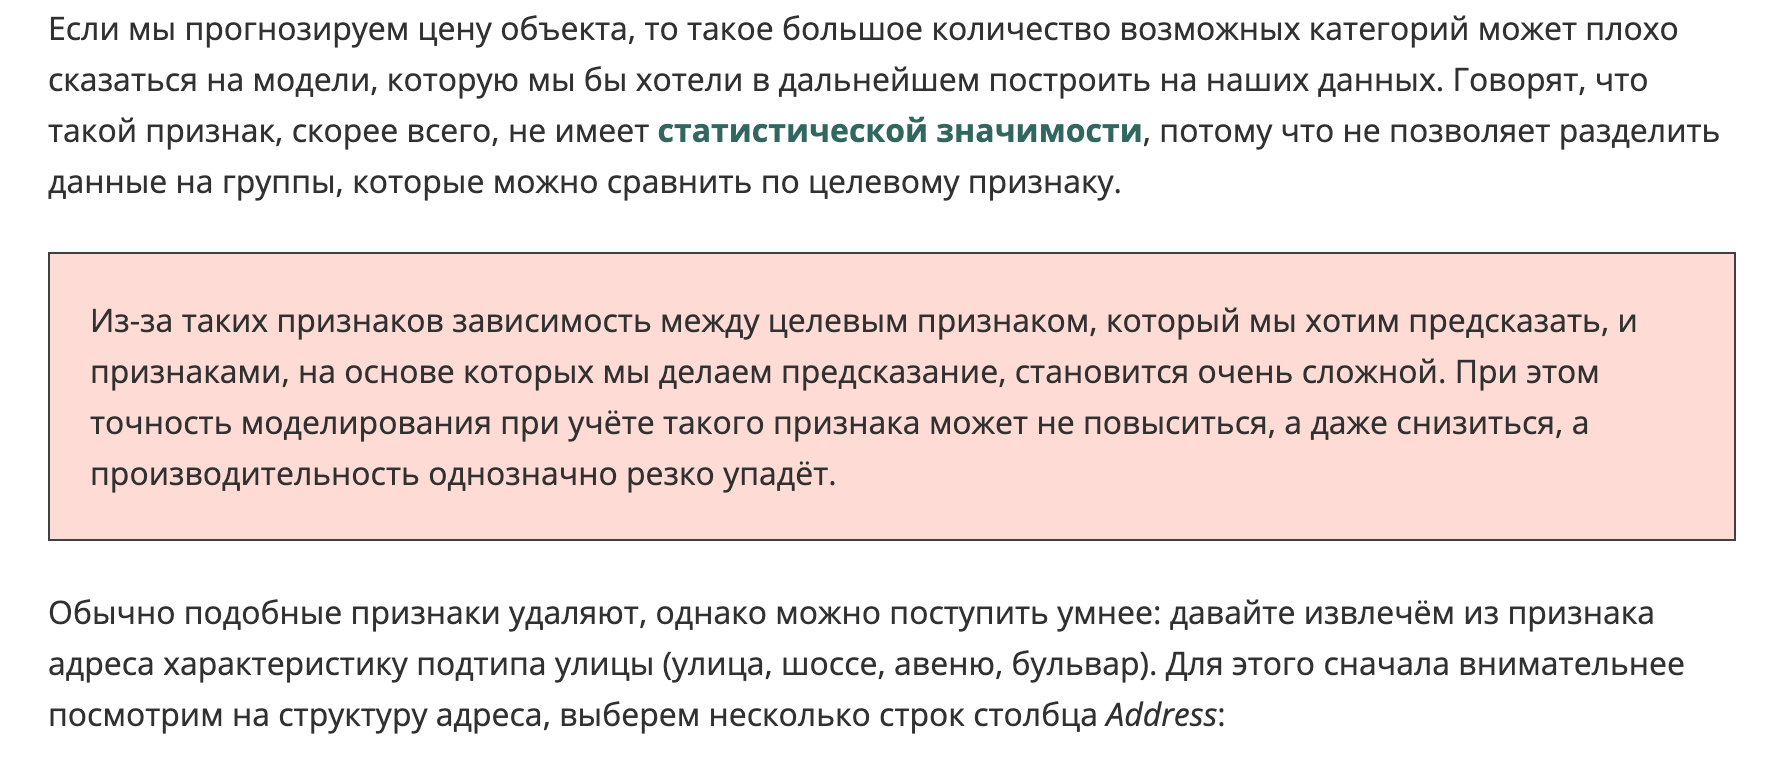

In [85]:
print(melb_df['Address'].loc[177])
print(melb_df['Address'].loc[1812])
print(melb_df['Address'].loc[9001])


2/119 Railway St N
9/400 Dandenong Rd
172 Danks St


In [86]:
# Для того чтобы выделить подтип улицы, на которой находится объект, можно 
# использовать следующую функцию:

# На вход данной функции поступает строка с адресом.
def get_street_type(address):
# Создаём список географических пометок exclude_list.
    exclude_list = ['N', 'S', 'W', 'E']
# Метод split() разбивает строку на слова по пробелу.
# В результате получаем список слов в строке и заносим его в переменную address_list.
    address_list = address.split(' ')
# Обрезаем список, оставляя в нём только последний элемент,
# потенциальный подтип улицы, и заносим в переменную street_type.
    street_type = address_list[-1]
# Делаем проверку на то, что полученный подтип является географической пометкой.
# Для этого проверяем его на наличие в списке exclude_list.
    if street_type in exclude_list:
# Если переменная street_type является географической пометкой,
# переопределяем её на второй элемент с конца списка address_list.
        street_type = address_list[-2]
# Возвращаем переменную street_type, в которой хранится подтип улицы.
    return street_type

In [87]:
# Теперь применим эту функцию к столбцу c адресом. Для этого передадим функцию 
# get_street_type в аргумент метода столбца apply(). В результате получим объект 
# Series, который положим в переменную street_types:

street_types = melb_df['Address'].apply(get_street_type)
display(street_types)

0        St
1        St
2        St
3        La
4        St
         ..
13575    Cr
13576    Dr
13577    St
13578    St
13579    St
Name: Address, Length: 13580, dtype: object

In [88]:
# Итак, мы смогли выделить подтип улицы. Посмотрим, сколько уникальных значений у нас получилось:

print(street_types.nunique())

56


In [89]:
# У нас есть 56 уникальных значений. Однако наш результат можно улучшить. Давайте для 
# начала посмотрим на частоту каждого подтипа улицы с помощью метода value_counts:

display(street_types.value_counts())

St         8012
Rd         2825
Ct          612
Dr          447
Av          321
           ... 
Grange        1
Terrace       1
Cove          1
Qy            1
Corso         1
Name: Address, Length: 56, dtype: int64

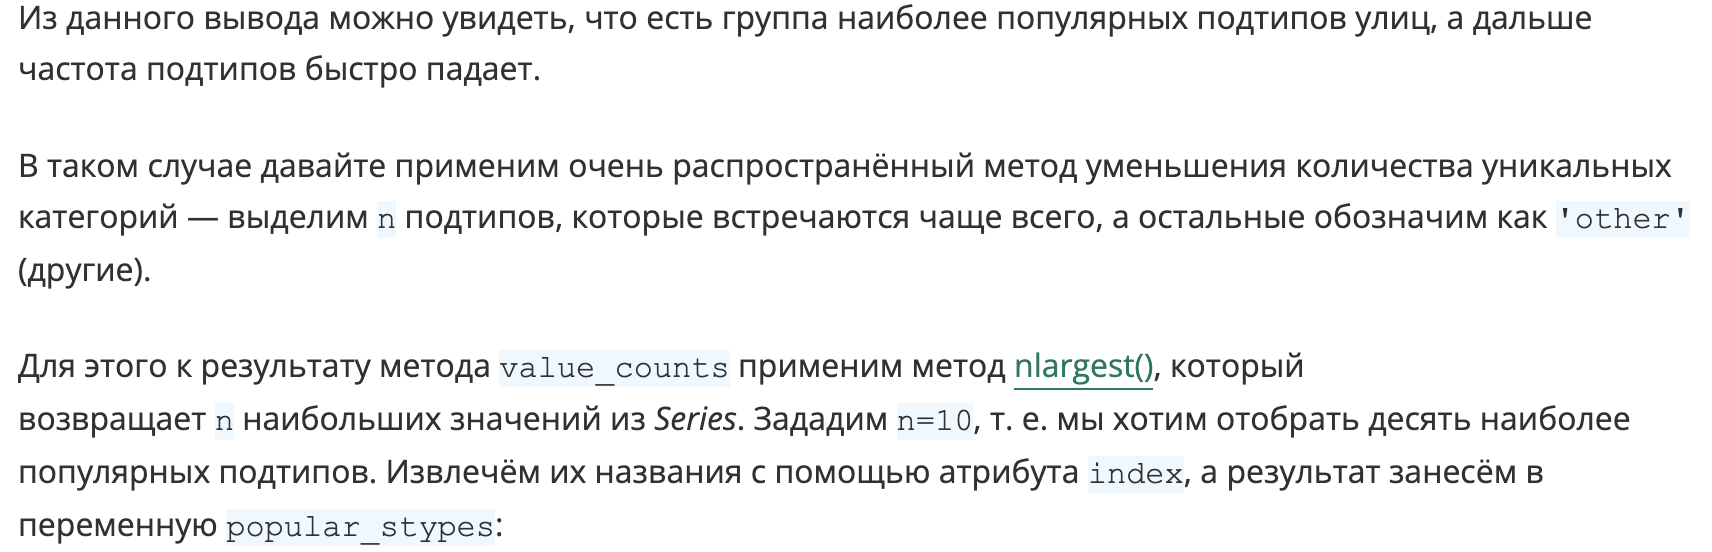

In [90]:
popular_stypes =street_types.value_counts().nlargest(10).index
print(popular_stypes)

Index(['St', 'Rd', 'Ct', 'Dr', 'Av', 'Gr', 'Pde', 'Pl', 'Cr', 'Cl'], dtype='object')


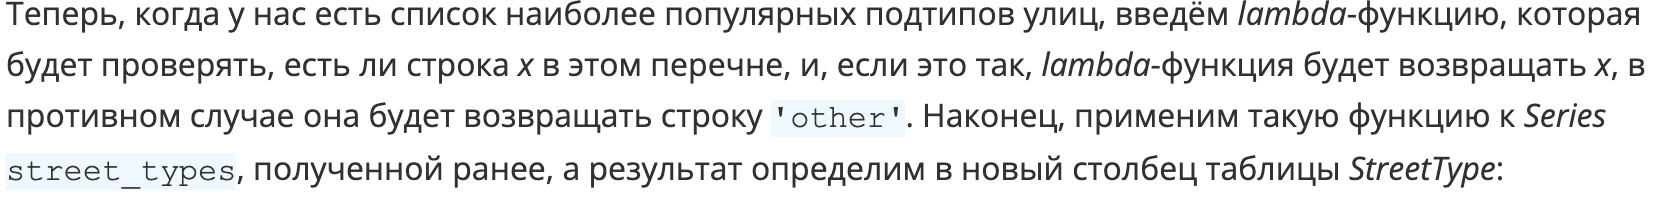

In [91]:
melb_df['StreetType'] = street_types.apply(lambda x: x if x in popular_stypes else 'other')
display(melb_df['StreetType'])

0           St
1           St
2           St
3        other
4           St
         ...  
13575       Cr
13576       Dr
13577       St
13578       St
13579       St
Name: StreetType, Length: 13580, dtype: object

In [92]:
# Посмотрим на результирующее число уникальных подтипов:

print(melb_df['StreetType'].nunique())

11


In [93]:
# Теперь, у нас нет потребности хранить признак Address, так как, если конкретное 
# местоположение объекта всё же и влияет на его стоимость, то оно определяется столбцами
# Longitude и Lattitude. Удалим его из нашей таблицы:

melb_df = melb_df.drop('Address', axis=1)

Резюмируя, поделимся общими рекомендациями по уменьшению числа уникальных значений в признаке, который описывается категориями:

1. Определите (хотя бы на глаз) соотношение числа уникальных категорий интересующего вас признака к общему числу объектов в таблице. Если это соотношение превышает значение 30 %, то это уже повод задуматься над уменьшением числа категорий и перейти к шагу 2.

2. Если ваш признак уникален для каждого объекта, например адрес, имя или название, то такой признак, скорее всего, не имеет статистической значимости. От таких признаков чаще всего избавляются. Однако можно попробовать выделить из этого признака какие-то общие черты, например, как мы это сделали с подтипами улиц. Такой же трюк можно произвести, например, с названиями компаний, в которых может быть скрыт признак типа организации (из строки «ООО Три Слепые Мыши» можно извлечь ООО — общество с ограниченной ответственностью).

3. Если даже после преобразования число уникальных категорий всё ещё велико, можно попробовать с помощью метода value_counts() оценить, есть ли в данных категории, которые употребляются гораздо реже, чем остальные. Если такие категории присутствуют, переходите к шагу 4.

4. Можно подобрать число  популярных категорий таким образом, чтобы эти категории покрывали большую часть ваших данных.

5. Наконец, можно совершить преобразование, обозначив категории, не попавшие в число популярных, как «другие».



# 4.2
Напишите функцию get_weekend(weekday), которая принимает на вход элемент столбца WeekdaySale и возвращает 1, если день является выходным, и 0 — в противном случае, и создайте столбец Weekend в таблице melb_df с помощью неё.

Примените эту функцию к столбцу и вычислите среднюю цену объекта недвижимости, проданного в выходные дни. Результат округлите до целых.

In [94]:
def get_weekend(weekday):
    if weekday == 5 or weekday == 6:
# or if weekday in [5, 6]:
        return 1
    else:
        return 0

In [99]:
melb_df['Weekend'] = melb_df['WeekdaySale'].apply(get_weekend)
round(melb_df[melb_df['Weekend'] == 1]['Price'].mean())

1081199

# 4.3

- Преобразуйте столбец SellerG с наименованиями риелторских компаний в таблице melb_df следующим образом: оставьте в столбце только 49 самых популярных компаний, а остальные обозначьте как 'other'.
- Найдите, во сколько раз минимальная цена объектов недвижимости, проданных компанией 'Nelson', больше минимальной цены объектов, проданных компаниями, обозначенными как 'other'. Ответ округлите до десятых.

In [107]:
# создаем список 49 компаний
toprealtor = melb_df['SellerG'].value_counts().nlargest(49).index
# Создаем параметр на основание списка просматривая SellerG
melb_df['Realtor'] = melb_df['SellerG'].apply(lambda x: x if x 
                                              in toprealtor else 'other')
melb_df['Realtor'].nunique()

50

In [110]:
minNelson = melb_data[melb_df['Realtor'] == 'Nelson']['Price'].min()
minOther = melb_data[melb_df['Realtor'] == 'other']['Price'].min()
contrast = round(minNelson/minOther, 1)
print(minNelson, minOther, contrast)

170000.0 131000.0 1.3


# 4.4
Представьте, что вы занимаетесь подготовкой данных о вакансиях с платформы hh.ru. В вашем распоряжении имеется таблица, в которой с помощью парсинга собраны резюме кандидатов. В этой таблице есть текстовый столбец «Опыт работы». Пример такого столбца представлен ниже в виде объекта Series. Структура текста в столбце фиксирована и не может измениться.

Напишите функцию get_experience(arg), аргументом которой является строка столбца с опытом работы. Функция должна возвращать опыт работы в месяцах. Не забудьте привести результат к целому числу.

Примечание. Обратите внимание, что опыт работы может выражаться только в годах или только в месяцах. Учтите это при построении своей функции.

При проверке мы будем применять вашу функцию к разным Series с помощью метода apply().

Пример результата работы функции get_experience:


In [130]:
def get_experience(arg):
    month_key_words = ['месяц', 'месяцев', 'месяца']
    year_key_words = ['год', 'лет', 'года']
    args_splited = arg.split(' ')
    month = 0
    year = 0
    for i in range(len(args_splited)):
        if args_splited[i] in month_key_words:
            month = args_splited[i-1]
        if args_splited[i] in year_key_words:
            year = args_splited[i-1]
    return int(year)*12 + int(month)

In [132]:
test_series_1 = pd.Series([
    'Опыт работы 8 лет 3 месяца',
    'Опыт работы 3 года 5 месяцев',
    'Опыт работы 1 год 9 месяцев',
    'Опыт работы 3 месяца',
    'Опыт работы 6 лет'
])

test_series_2 = pd.Series([
    'Опыт работы 5 лет',
    'Опыт работы 5 месяцев',
    'Опыт работы 1 год 1 месяц',
    'Опыт работы 3 месяца',
    'Опыт работы 7 лет'
])

print(test_series_1.apply(get_experience))
print(test_series_2.apply(get_experience))

0    99
1    41
2    21
3     3
4    72
dtype: int64
0    60
1     5
2    13
3     3
4    84
dtype: int64


# 5. Тип данных Category

__ПРИЗНАКИ: КАТЕГОРИАЛЬНЫЕ И ЧИСЛОВЫЕ__

Рассмотрим такие статистические термины, как категориальные и числовые признаки.

Под числовыми признаками обычно подразумевают признаки, которые отражают количественную меру и могут принимать значения из неограниченного диапазона.

Числовые признаки могут быть:

- дискретными (например, количество комнат, пациентов, дней);
- непрерывными (например, масса, цена, площадь).
- Дискретные признаки чаще всего представлены целыми числами, а непрерывные — целыми числами и числами с плавающей точкой.

Под категориальными признаками обычно подразумевают столбцы в таблице, которые обозначают принадлежность объекта к какому-то классу/категории.

Категориальные признаки могут быть:

- номинальными (например, пол, национальность, район);
- порядковыми (например, уровень образования, уровень комфорта, стадия заболевания).

Такие признаки имеют ограниченный набор значений. Они чаще всего представлены в виде текстового описания и кодируются в Pandas типом данных object.

Однако это не всегда так. Например, созданный нами ранее признак месяца продажи кодируется числом (от 1 до 12), но на самом деле является категориальным, поскольку диапазон его значений ограничен и каждому числу мы можем поставить в соответствие название месяца.

#### КАТЕГОРИИ В ДАННЫХ О НЕДВИЖИМОСТИ

Давайте определим число уникальных категорий в каждом столбце нашей таблицы melb_df. Для этого создадим вспомогательную таблицу unique_counts:

In [133]:
# создаём пустой список
unique_list = []
# пробегаемся по именам столбцов в таблице
for col in melb_df.columns:
    # создаём кортеж (имя столбца, число уникальных значений)
    item = (col, melb_df[col].nunique(),melb_df[col].dtypes)     # добавляем кортеж в список
    unique_list.append(item) 
# создаём вспомогательную таблицу и сортируем её
unique_counts = pd.DataFrame(
    unique_list,
    columns=['Column_Name', 'Num_Unique', 'Type']
).sort_values(by='Num_Unique',  ignore_index=True)
# выводим её на экран
display(unique_counts)

,Column_Name,Num_Unique,Type
0,Weekend,2,int64
1,Type,3,object
2,Method,5,object
3,WeekdaySale,5,int64
4,Regionname,8,object
5,Rooms,9,int64
6,Bathroom,9,int64
7,StreetType,11,object
8,Car,11,int64
9,Bedroom,12,int64


Разберём код подробнее:

1. Создаём пустой список, в который будем добавлять кортежи: имя столбца, количество уникальных значений в нём и тип столбца.

2. В цикле перебираем имена столбцов, которые получаем с помощью атрибута columns. В переменной col на каждой итерации находятся имена столбцов — обращаемся к ним в цикле и извлекаем число уникальных элементов с помощью метода nunique(), а также тип столбца с помощью атрибута dtypes. Результат заносим в кортеж и добавляем его в список.

3. Из списка с кортежами (имя столбца, количество уникальных значений в нём, тип столбца) создаём DataFrame, даём названия его столбцам: Column_Name, Num_unique и Type.

4. Сортируем таблицу по столбцу Num_unique в порядке возрастания количества уникальных элементов с помощью метода sort_values() и выводим результат на экран.

Что интересного мы можем узнать из такой таблицы?

Если присмотреться внимательно, можно увидеть резкий скачок количества уникальных значений, начиная с 14 строки таблицы, где число уникальных значений составляет 152. Учтём этот момент.

Условимся, что категориальными будем считать признаки, у которых число уникальных категорий меньше 150. 

Однако учтём, что признак Date (дата продажи), преобразованный нами ранее в формат datetime, является временным признаком, поэтому далее не будем его воспринимать как категориальный. 

К тому же в наш потенциальный список попали количественные столбцы Rooms, Car, Bedroom и Bathroom. Договоримся, что мы не будем относить их к разряду категориальных, однако, как упоминалось ранее, такое тоже вполне возможно.

Примечание. Ещё раз подчеркиваем, что такая классификация признаков является исключительно субъективной и специфична для задачи.

#### ТИП ДАННЫХ CATEGORY

Для хранения и оптимизации работы с категориальными признаками в Pandas предусмотрен специальный тип данных — category.

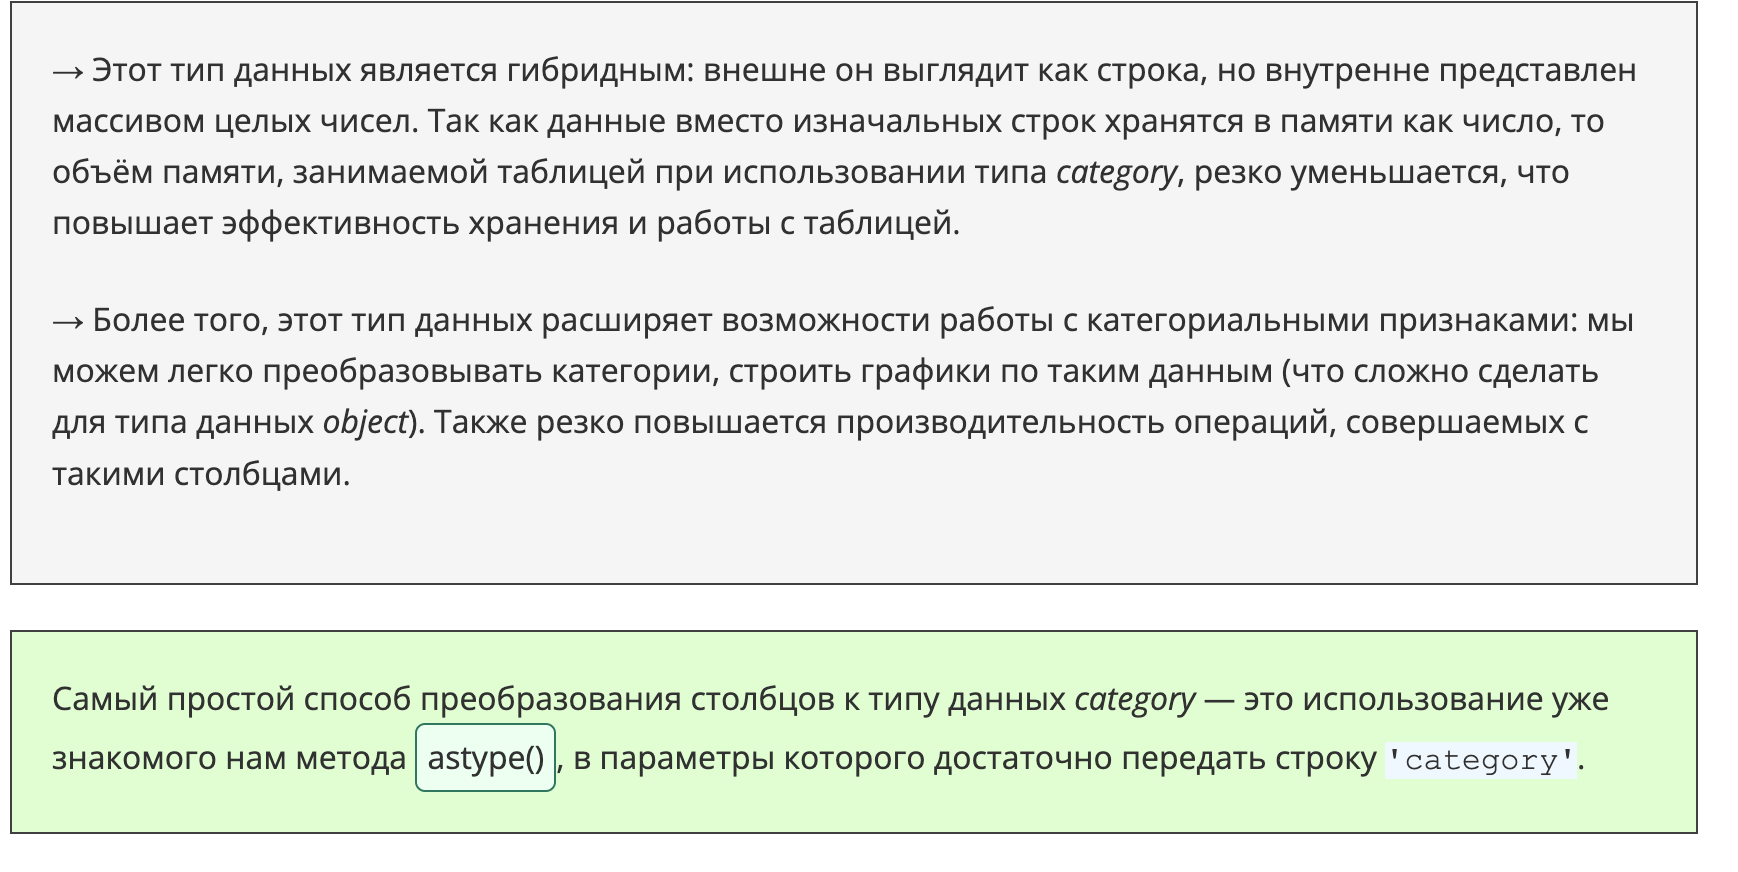

In [134]:
display(melb_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  object        
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  object        
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  object        
 5   SellerG          13580 non-null  object        
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  objec

None

In [135]:
# Сделаем преобразование столбцов к типу данных category:
cols_to_exclude = ['Date', 'Rooms', 'Bedroom', 'Bathroom', 'Car'] # список столбцов, которые мы не берём во внимание
max_unique_count = 150 # задаём максимальное число уникальных категорий
for col in melb_df.columns: # цикл по именам столбцов
    if melb_df[col].nunique() < max_unique_count and col not in cols_to_exclude: # проверяем условие
        melb_df[col] = melb_df[col].astype('category') # преобразуем тип столбца
display(melb_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  object        
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  category      
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  category      
 5   SellerG          13580 non-null  object        
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  categ

None

Разберём код подробнее:

1. Задаём список столбцов, которые мы не берём в рассмотрение (cols_to_exclude), а также условленный нами ранее порог уникальных значений столбца max_unique_count.

2. В цикле перебираем имена столбцов, и, если число уникальных категорий меньше заданного порога и имён столбцов нет в списке cols_to_exclude, то с помощью метода astype() приводим столбец к типу данных category.

3. Итоговый объём памяти — 2.0 Мб. В результате такого преобразования объём памяти, занимаемый таблицей, уменьшился почти на треть!

__ПОЛУЧЕНИЕ АТРИБУТОВ CATEGORY__

У типа данных category есть свой специальный аксесcор cat, который позволяет получать информацию о своих значениях и преобразовывать их. Например, с помощью атрибута этого аксессора categories мы можем получить список уникальных категорий в столбце Regionname:

In [136]:
print(melb_df['Regionname'].cat.categories)

Index(['Eastern Metropolitan', 'Eastern Victoria', 'Northern Metropolitan',
       'Northern Victoria', 'South-Eastern Metropolitan',
       'Southern Metropolitan', 'Western Metropolitan', 'Western Victoria'],
      dtype='object')


In [143]:
# А теперь посмотрим, каким образом столбец кодируется в виде чисел в памяти компьютера.
# Для этого можно воспользоваться атрибутом codes:

display(melb_df['Regionname'].cat.codes)

0        2
1        2
2        2
3        2
4        2
        ..
13575    4
13576    6
13577    6
13578    6
13579    6
Length: 13580, dtype: int8

In [144]:
# С помощью метода аксессора rename_categories() можно легко переименовать текущие 
# значения категорий. Для этого в данный метод нужно передать словарь, ключи которого — 
# старые имена категорий, а значения — новые.
# Рассмотрим на примере: переименуем категории признака типа постройки Type — заменим 
# их на полные названия (напомним, u — unit, h — house, t — townhouse).

melb_df['Type'] = melb_df['Type'].cat.rename_categories({
    'u': 'unit',
    't': 'townhouse',
    'h': 'house'
})
display(melb_df['Type'])

0        house
1        house
2        house
3        house
4        house
         ...  
13575    house
13576    house
13577    house
13578    house
13579    house
Name: Type, Length: 13580, dtype: category
Categories (3, object): ['house', 'townhouse', 'unit']

#### ПОДВОДНЫЕ КАМНИ

А теперь представим ситуацию, что появилась новая партия домов и теперь мы продаём и квартиры (flat). Создадим объект Series new_houses_types, в котором будем хранить типы зданий новой партии домов. Преобразуем тип new_houses_types в такой же тип, как и у столбца Type в таблице melb_data, и выведем результат на экран:

In [145]:
new_houses_types = pd.Series(['unit', 'house', 'flat', 'flat', 'house'])
new_houses_types = new_houses_types.astype(melb_df['Type'].dtype)
display(new_houses_types)

0     unit
1    house
2      NaN
3      NaN
4    house
dtype: category
Categories (3, object): ['house', 'townhouse', 'unit']

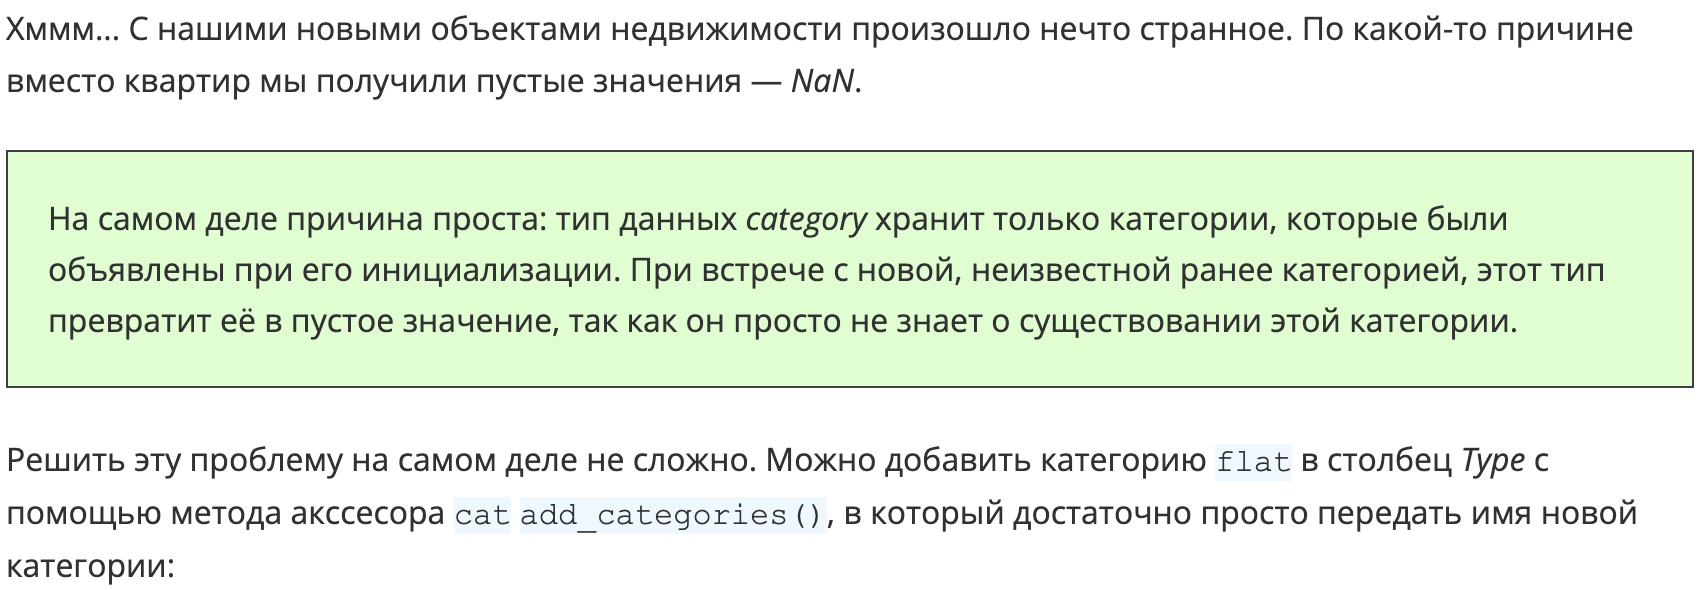

In [146]:
melb_df['Type'] = melb_df['Type'].cat.add_categories('flat')
new_houses_types = pd.Series(['unit', 'house', 'flat', 'flat', 'house'])
new_houses_types = new_houses_types.astype(melb_df['Type'].dtype)
display(new_houses_types)

0     unit
1    house
2     flat
3     flat
4    house
dtype: category
Categories (4, object): ['house', 'townhouse', 'unit', 'flat']

Теперь, когда мы рассмотрели основные моменты и нюансы работы с типом данных category, можно сформулировать несколько рекомендаций по его использованию:

1. Необязательно каждый раз преобразовывать категориальные данные в тип данных category. Зачастую это делается исключительно для оптимизации работы с большими данными.

2. Если набор данных занимает значительный процент используемой оперативной памяти, рассмотрите возможность использования типа category.

3. Если у вас очень серьёзные проблемы с производительностью, обратите внимание на использование типа category.

4. Если вы решили использовать тип category, будьте осторожны при добавлении новой информации в вашу таблицу. Убедитесь, что вы собрали всю необходимую информацию, произведите предобработку данных и только после этого используйте преобразование типов.

# 5.2

При преобразовании столбцов таблицы о недвижимости к типу category мы оставили без внимания столбец Suburb (пригород). Давайте исправим это.

- С помощью метода info() узнайте, сколько памяти занимает таблица melb_df.
- Преобразуйте признак Suburb следующим образом: оставьте в столбце только 119 наиболее популярных пригородов, остальные замените на 'other'.
- Приведите данные в столбце Suburb к категориальному типу.

В качестве ответа запишите разницу между объёмом занимаемой памяти до преобразования (который мы получили ранее в модуле) и после него в Мб. Ответ округлите до десятых.

In [151]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  object        
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  category      
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  category      
 5   SellerG          13580 non-null  object        
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  categ

In [149]:
melb_df['Suburb'].nunique()

314

In [153]:
# создаем список top 119 пригородов
topsub = melb_df['Suburb'].value_counts().nlargest(119).index
# Создаем параметр на основание списка просматривая Suburb
melb_df['Suburb'] = melb_df['Suburb'].apply(lambda x: x if x 
                                              in topsub else 'other')
melb_df['Suburb'] = melb_df['Suburb'].astype('category') # преобразуем тип столбца

In [163]:
melb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 27 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Suburb           13580 non-null  category      
 1   Rooms            13580 non-null  int64         
 2   Type             13580 non-null  category      
 3   Price            13580 non-null  float64       
 4   Method           13580 non-null  category      
 5   SellerG          13580 non-null  object        
 6   Date             13580 non-null  datetime64[ns]
 7   Distance         13580 non-null  float64       
 8   Postcode         13580 non-null  int64         
 9   Bedroom          13580 non-null  int64         
 10  Bathroom         13580 non-null  int64         
 11  Car              13580 non-null  int64         
 12  Landsize         13580 non-null  float64       
 13  BuildingArea     13580 non-null  float64       
 14  CouncilArea      12211 non-null  categ

# Закрепление

Вашим заданием в этом модуле будет проанализировать и преобразовать данные о велопоездках клиентов компании Citi Bike (США), специализирующейся на прокате велосипедов.

Датасет представляет собой таблицу с информацией о 300 тысячах поездок за первые пять дней сентября 2018 года и включает в себя следующую информацию:

- starttime — время начала поездки (дата, время);
- stoptime — время окончания поездки (дата, время);
- start station id — идентификатор стартовой стоянки;
- start station name — название стартовой стоянки;
- start station latitude, start station longitude — географическая широта и долгота стартовой стоянки;
- end station id — идентификатор конечной стоянки;
- end station name — название конечной стоянки;
- end station latitude, end station longitude — географическая широта и долгота конечной стоянки;
- bikeid — идентификатор велосипеда;
- usertype — тип пользователя (Customer — клиент с подпиской на 24 часа или на три дня, Subscriber — подписчик с годовой арендой велосипеда);
- birth year — год рождения клиента;
- gender — пол клиента (0 — неизвестный, 1 — мужчина, 2 — женщина).

In [203]:
city_bike = pd.read_csv('data/citibike-tripdata.csv', sep=',')

In [204]:
city_bike

,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,2018-09-01 00:00:05.2690,2018-09-01 00:27:20.6340,252.0,MacDougal St & Washington Sq,40.732264,-73.998522,366.0,Clinton Ave & Myrtle Ave,40.693261,-73.968896,25577,Subscriber,1980,1
1,2018-09-01 00:00:11.2810,2018-09-01 00:02:23.4810,314.0,Cadman Plaza West & Montague St,40.693830,-73.990539,3242.0,Schermerhorn St & Court St,40.691029,-73.991834,34377,Subscriber,1969,0
2,2018-09-01 00:00:20.6490,2018-09-01 00:55:58.5470,3142.0,1 Ave & E 62 St,40.761227,-73.960940,3384.0,Smith St & 3 St,40.678724,-73.995991,30496,Subscriber,1975,1
3,2018-09-01 00:00:21.7460,2018-09-01 00:07:38.5830,308.0,St James Pl & Oliver St,40.713079,-73.998512,3690.0,Park Pl & Church St,40.713342,-74.009355,28866,Subscriber,1984,2
4,2018-09-01 00:00:27.3150,2018-09-01 02:21:25.3080,345.0,W 13 St & 6 Ave,40.736494,-73.997044,380.0,W 4 St & 7 Ave S,40.734011,-74.002939,20943,Customer,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2018-09-05 19:08:27.8460,2018-09-05 19:15:51.4940,494.0,W 26 St & 8 Ave,40.747348,-73.997236,448.0,W 37 St & 10 Ave,40.756604,-73.997901,19531,Subscriber,1990,2
299996,2018-09-05 19:08:28.3700,2018-09-05 19:20:01.5080,3016.0,Kent Ave & N 7 St,40.720368,-73.961651,3086.0,Graham Ave & Conselyea St,40.715143,-73.944507,34020,Subscriber,1982,1
299997,2018-09-05 19:08:27.5090,2018-09-05 19:13:40.5060,3686.0,Gansevoort St & Hudson St,40.739448,-74.005070,168.0,W 18 St & 6 Ave,40.739713,-73.994564,33220,Subscriber,1991,1
299998,2018-09-05 19:08:29.2300,2018-09-05 20:04:29.3220,254.0,W 11 St & 6 Ave,40.735324,-73.998004,499.0,Broadway & W 60 St,40.769155,-73.981918,34744,Subscriber,1975,0


In [205]:
# Сколько пропусков в столбце start station id? = 169 пропусков
# Какой тип данных имеют столбцы starttime и stoptime? object
city_bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   starttime                300000 non-null  object 
 1   stoptime                 300000 non-null  object 
 2   start station id         299831 non-null  float64
 3   start station name       299831 non-null  object 
 4   start station latitude   300000 non-null  float64
 5   start station longitude  300000 non-null  float64
 6   end station id           299831 non-null  float64
 7   end station name         299831 non-null  object 
 8   end station latitude     300000 non-null  float64
 9   end station longitude    300000 non-null  float64
 10  bikeid                   300000 non-null  int64  
 11  usertype                 300000 non-null  object 
 12  birth year               300000 non-null  int64  
 13  gender                   300000 non-null  int64  
dtypes: f

In [206]:
# Найдите идентификатор самой популярной стартовой стоянки. Запишите идентификатор 
# в виде целого числа.
city_bike['start station id'].mode()

0    281.0
dtype: float64

In [207]:
# Велосипед с каким идентификатором является самым популярным?
city_bike['bikeid'].mode()

0    33887
dtype: int64

In [208]:
# Какой тип клиентов (столбец usertype) является преобладающим — Subscriber или 
# Customer? В качестве ответа запишите долю клиентов преобладающего типа среди общего 
# количества клиентов. Ответ округлите до сотых.
round(city_bike['usertype'].value_counts(normalize=True), 2)

Subscriber    0.77
Customer      0.23
Name: usertype, dtype: float64

In [209]:
# Кто больше занимается велоспортом — мужчины или женщины? В ответ запишите число
# поездок для той группы, у которой их больше.
city_bike['gender'].value_counts()

1    183582
2     74506
0     41912
Name: gender, dtype: int64

In [210]:
city_bike.describe()

,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,299831.000000,300000.000000,300000.000000,299831.000000,300000.000000,300000.000000,300000.000000,300000.000000,300000.000000
mean,1695.665665,40.737769,-73.982042,1684.624298,40.737294,-73.982330,26688.525943,1979.364803,1.108647
std,1458.264055,0.031999,0.020207,1457.549589,0.031794,0.020261,6271.691143,11.920796,0.613398
min,72.000000,40.655400,-74.025353,72.000000,40.655400,-74.083639,14529.000000,1885.000000,0.000000
25%,387.000000,40.716226,-73.995991,387.000000,40.716059,-73.996621,20569.000000,1969.000000,1.000000
50%,519.000000,40.737262,-73.985162,519.000000,40.737050,-73.985649,28197.000000,1982.000000,1.000000
75%,3282.000000,40.760683,-73.970416,3282.000000,40.760094,-73.971092,32216.000000,1989.000000,1.000000
max,3705.000000,40.869000,-73.878000,3705.000000,40.869000,-73.878000,34863.000000,2002.000000,2.000000


In [211]:
city_bike.describe(include=object)

,starttime,stoptime,start station name,end station name,usertype
count,300000,300000,299831,299831,300000
unique,299836,299813,759,765,2
top,2018-09-02 13:59:41.7770,2018-09-04 17:51:07.9110,Grand Army Plaza & Central Park S,West St & Chambers St,Subscriber
freq,2,2,1928,1963,232202


In [212]:
# В наших данных присутствуют столбцы, которые дублируют информацию друг о друге: это
# столбцы с идентификатором и названием стартовой и конечной стоянки. Удалите признаки
# идентификаторов стоянок. Сколько столбцов осталось?
city_bike = city_bike.drop(['start station id', 'end station id'], axis=1)
city_bike.shape[1]

12

In [213]:
# Замените признак birth year на более понятный признак возраста клиента age. Годом 
# отсчёта возраста выберите 2018 год. Столбец birth year удалите из таблицы. Сколько
# поездок совершено клиентами старше 60 лет?

city_bike['age'] = (2018 - city_bike['birth year'])

city_bike = city_bike.drop(['birth year'], axis=1)

city_bike[city_bike['age'] > 60].count()

starttime                  11837
stoptime                   11837
start station name         11837
start station latitude     11837
start station longitude    11837
end station name           11837
end station latitude       11837
end station longitude      11837
bikeid                     11837
usertype                   11837
gender                     11837
age                        11837
dtype: int64

In [214]:
city_bike[city_bike['age'] > 60]['age'].count()

11837

In [215]:
# Создайте признак длительности поездки trip duration. Для этого вычислите интервал 
# времени между временем окончания поездки (stoptime) и её началом (starttime). 
# Сколько целых минут длилась поездка под индексом 3 в таблице?
city_bike['starttime'] = pd.to_datetime(city_bike['starttime'])
city_bike['stoptime'] = pd.to_datetime(city_bike['stoptime'])
city_bike['trip duration'] = city_bike['stoptime'] - city_bike['starttime']
city_bike

,starttime,stoptime,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,bikeid,usertype,gender,age,trip duration
0,2018-09-01 00:00:05.269,2018-09-01 00:27:20.634,MacDougal St & Washington Sq,40.732264,-73.998522,Clinton Ave & Myrtle Ave,40.693261,-73.968896,25577,Subscriber,1,38,0 days 00:27:15.365000
1,2018-09-01 00:00:11.281,2018-09-01 00:02:23.481,Cadman Plaza West & Montague St,40.693830,-73.990539,Schermerhorn St & Court St,40.691029,-73.991834,34377,Subscriber,0,49,0 days 00:02:12.200000
2,2018-09-01 00:00:20.649,2018-09-01 00:55:58.547,1 Ave & E 62 St,40.761227,-73.960940,Smith St & 3 St,40.678724,-73.995991,30496,Subscriber,1,43,0 days 00:55:37.898000
3,2018-09-01 00:00:21.746,2018-09-01 00:07:38.583,St James Pl & Oliver St,40.713079,-73.998512,Park Pl & Church St,40.713342,-74.009355,28866,Subscriber,2,34,0 days 00:07:16.837000
4,2018-09-01 00:00:27.315,2018-09-01 02:21:25.308,W 13 St & 6 Ave,40.736494,-73.997044,W 4 St & 7 Ave S,40.734011,-74.002939,20943,Customer,1,24,0 days 02:20:57.993000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2018-09-05 19:08:27.846,2018-09-05 19:15:51.494,W 26 St & 8 Ave,40.747348,-73.997236,W 37 St & 10 Ave,40.756604,-73.997901,19531,Subscriber,2,28,0 days 00:07:23.648000
299996,2018-09-05 19:08:28.370,2018-09-05 19:20:01.508,Kent Ave & N 7 St,40.720368,-73.961651,Graham Ave & Conselyea St,40.715143,-73.944507,34020,Subscriber,1,36,0 days 00:11:33.138000
299997,2018-09-05 19:08:27.509,2018-09-05 19:13:40.506,Gansevoort St & Hudson St,40.739448,-74.005070,W 18 St & 6 Ave,40.739713,-73.994564,33220,Subscriber,1,27,0 days 00:05:12.997000
299998,2018-09-05 19:08:29.230,2018-09-05 20:04:29.322,W 11 St & 6 Ave,40.735324,-73.998004,Broadway & W 60 St,40.769155,-73.981918,34744,Subscriber,0,43,0 days 00:56:00.092000


In [216]:
# Создайте «признак-мигалку» weekend, который равен 1, если поездка начиналась в 
# выходной день (суббота или воскресенье), и 0 — в противном случае. Выясните, сколько 
# поездок начиналось в выходные.
# Создаем столбец с днями неделями
city_bike['weekend'] = city_bike['starttime'].dt.dayofweek
# Применяем функцию
city_bike['weekend'] = city_bike['weekend'].apply(get_weekend)
# подсчитываем 1 
city_bike[city_bike['weekend'] == 1]['weekend'].shape[0]

115135

Создайте признак времени суток поездки time_of_day. Время суток будем определять из часа начала поездки. Условимся, что:
- поездка совершается ночью (night), если её час приходится на интервал от 0 (включительно) до 6 (включительно) часов;
- поездка совершается утром (morning), если её час приходится на интервал от 6 (не включительно) до 12 (включительно) часов;
- поездка совершается днём (day), если её час приходится на интервал от 12 (не включительно) до 18 (включительно) часов;
- поездка совершается вечером (evening), если её час приходится на интервал от 18 (не включительно) до 23 часов (включительно).

Во сколько раз количество поездок, совершённых днём, больше, чем количество поездок, совёршенных ночью, за представленный в данных период времени? Ответ округлите до целых.

In [227]:
# создадим параметр с часами (столбец)
city_bike['time_of_day'] = city_bike['starttime'].dt.hour
city_bike['time_of_day']

0          0
1          0
2          0
3          0
4          0
          ..
299995    19
299996    19
299997    19
299998    19
299999    19
Name: time_of_day, Length: 300000, dtype: int64

In [228]:
# сделаем функцию для преобразования 
def timeofday(hour):
    if 0 <= hour <= 6:
        return 'night'
    elif 6 < hour <= 12:
        return 'morning'
    elif 12 < hour <= 18:
        return 'day'
    elif 18 < hour <= 23:
        return 'evening'
    else:
        return 'Invalid hour'
# преобразуем    
city_bike['time_of_day'] = city_bike['time_of_day'].apply(timeofday)
city_bike

,starttime,stoptime,start station name,start station latitude,start station longitude,end station name,end station latitude,end station longitude,bikeid,usertype,gender,age,trip duration,weekend,time_of_day
0,2018-09-01 00:00:05.269,2018-09-01 00:27:20.634,MacDougal St & Washington Sq,40.732264,-73.998522,Clinton Ave & Myrtle Ave,40.693261,-73.968896,25577,Subscriber,1,38,0 days 00:27:15.365000,1,night
1,2018-09-01 00:00:11.281,2018-09-01 00:02:23.481,Cadman Plaza West & Montague St,40.693830,-73.990539,Schermerhorn St & Court St,40.691029,-73.991834,34377,Subscriber,0,49,0 days 00:02:12.200000,1,night
2,2018-09-01 00:00:20.649,2018-09-01 00:55:58.547,1 Ave & E 62 St,40.761227,-73.960940,Smith St & 3 St,40.678724,-73.995991,30496,Subscriber,1,43,0 days 00:55:37.898000,1,night
3,2018-09-01 00:00:21.746,2018-09-01 00:07:38.583,St James Pl & Oliver St,40.713079,-73.998512,Park Pl & Church St,40.713342,-74.009355,28866,Subscriber,2,34,0 days 00:07:16.837000,1,night
4,2018-09-01 00:00:27.315,2018-09-01 02:21:25.308,W 13 St & 6 Ave,40.736494,-73.997044,W 4 St & 7 Ave S,40.734011,-74.002939,20943,Customer,1,24,0 days 02:20:57.993000,1,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299995,2018-09-05 19:08:27.846,2018-09-05 19:15:51.494,W 26 St & 8 Ave,40.747348,-73.997236,W 37 St & 10 Ave,40.756604,-73.997901,19531,Subscriber,2,28,0 days 00:07:23.648000,0,evening
299996,2018-09-05 19:08:28.370,2018-09-05 19:20:01.508,Kent Ave & N 7 St,40.720368,-73.961651,Graham Ave & Conselyea St,40.715143,-73.944507,34020,Subscriber,1,36,0 days 00:11:33.138000,0,evening
299997,2018-09-05 19:08:27.509,2018-09-05 19:13:40.506,Gansevoort St & Hudson St,40.739448,-74.005070,W 18 St & 6 Ave,40.739713,-73.994564,33220,Subscriber,1,27,0 days 00:05:12.997000,0,evening
299998,2018-09-05 19:08:29.230,2018-09-05 20:04:29.322,W 11 St & 6 Ave,40.735324,-73.998004,Broadway & W 60 St,40.769155,-73.981918,34744,Subscriber,0,43,0 days 00:56:00.092000,0,evening


In [229]:
city_bike['time_of_day'].value_counts()

day        143012
morning     95530
evening     46373
night       15085
Name: time_of_day, dtype: int64

In [230]:
round(143012/15085)

9

В этом модуле мы с вами сделали ещё один большой шаг в изучении библиотеки Pandas и её возможностей для анализа и подготовки данных.

Мы научились:

- производить базовые операции со столбцами (удалять их, производить с ними математические операции и приводить таблицу к нужной структуре);
- работать с датами и временем;
- создавать новые столбцы на основе составляющих дат и времени;
- применять собственные функции к столбцам таблицы для их преобразования и создания новых признаков;
- познакомились с категориальным типом данных и научились работать с ним.

Эти навыки лежат в основе методологии Feature Engineering и помогут вам в дальнейшем развивать своё мышление в этой области и расти как специалисту по генерации данных.

В следующем модуле мы поговорим о более продвинутых методах работы с данными, а также продолжим тему предобработки данных и научимся работать с данными, представленными в нескольких таблицах.

[Feature Engineering](https://hightech.fm/2018/08/09/featureengineering)